# Spotify_EDA_04

In [2]:
#Question_No.1:Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
#the needful.

#Answer:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv('spotify.csv')

# Step 2: Check for null values in the dataframe
null_values = df.isnull().sum()

# Display columns with null values (if any)
print("Null values per column:")
print(null_values)

# Step 3: Handle null values
# For simplicity, we will fill numeric columns with the median and categorical columns with the mode
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical columns
        df[column] = df[column].fillna(df[column].mode()[0])  # Fill with the mode
    else:  # Numeric columns
        df[column] = df[column].fillna(df[column].median())  # Fill with the median

# Verify if null values are handled
print("\nNull values after handling:")
print(df.isnull().sum())

# Step 4: Check for duplicate rows
duplicates = df.duplicated().sum()

# Display the number of duplicate rows
print(f"\nNumber of duplicate rows: {duplicates}")

# Step 5: Remove duplicate rows if any
df = df.drop_duplicates()

# Verify if duplicates are removed
print(f"\nNumber of rows after removing duplicates: {df.shape[0]}")

Null values per column:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Null values after handling:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Number of duplicate rows: 27

Number of rows after removing duplicates: 413


Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')


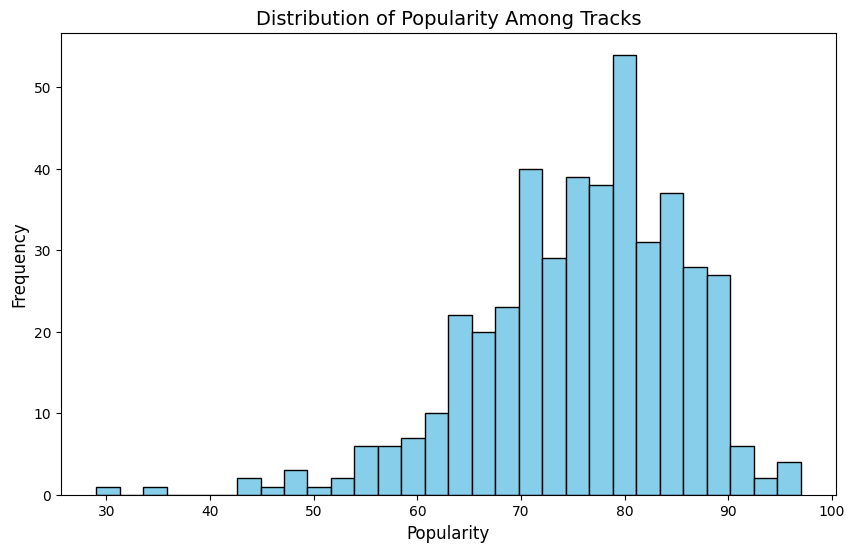

In [4]:
#Question_No.2: What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

#Answer:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('spotify.csv')

# Step 2: Check for the 'popularity' column
# Ensure that the column name is correct (e.g., 'popularity'). 
# If needed, you can print the column names to confirm.
print(df.columns)

# Step 3: Plot the distribution of popularity
plt.figure(figsize=(10,6))

# Assuming the column name is 'popularity'
plt.hist(df['Popularity'], bins=30, edgecolor='black', color='skyblue')

# Add title and labels
plt.title('Distribution of Popularity Among Tracks', fontsize=14)
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')


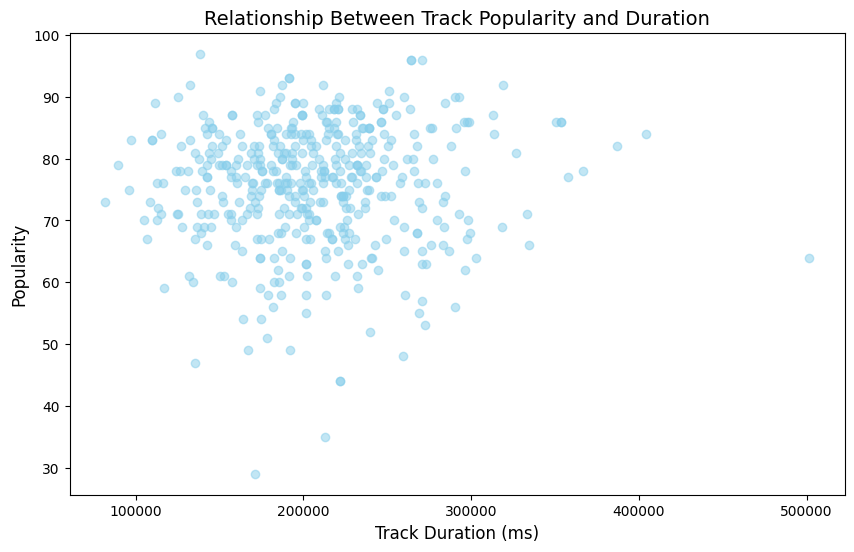

In [6]:
#Question_No.3: Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

#Answer:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('spotify.csv')

# Step 2: Check the column names to ensure we have 'popularity' and 'duration_ms'
print(df.columns)

# Step 3: Plot a scatter plot to explore the relationship between popularity and duration
plt.figure(figsize=(10,6))

# Assuming 'popularity' and 'duration_ms' are the columns for popularity and track duration (in milliseconds)
plt.scatter(df['Duration (ms)'], df['Popularity'], alpha=0.5, color='skyblue')

# Add title and labels
plt.title('Relationship Between Track Popularity and Duration', fontsize=14)
plt.xlabel('Track Duration (ms)', fontsize=12)
plt.ylabel('Popularity', fontsize=12)

# Show the plot
plt.show()

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')
The artist with the highest number of tracks is 'Drake' with 20 tracks.


/tmp/ipykernel_16118/4027510829.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Artist', order=artist_track_count.index, palette='viridis')


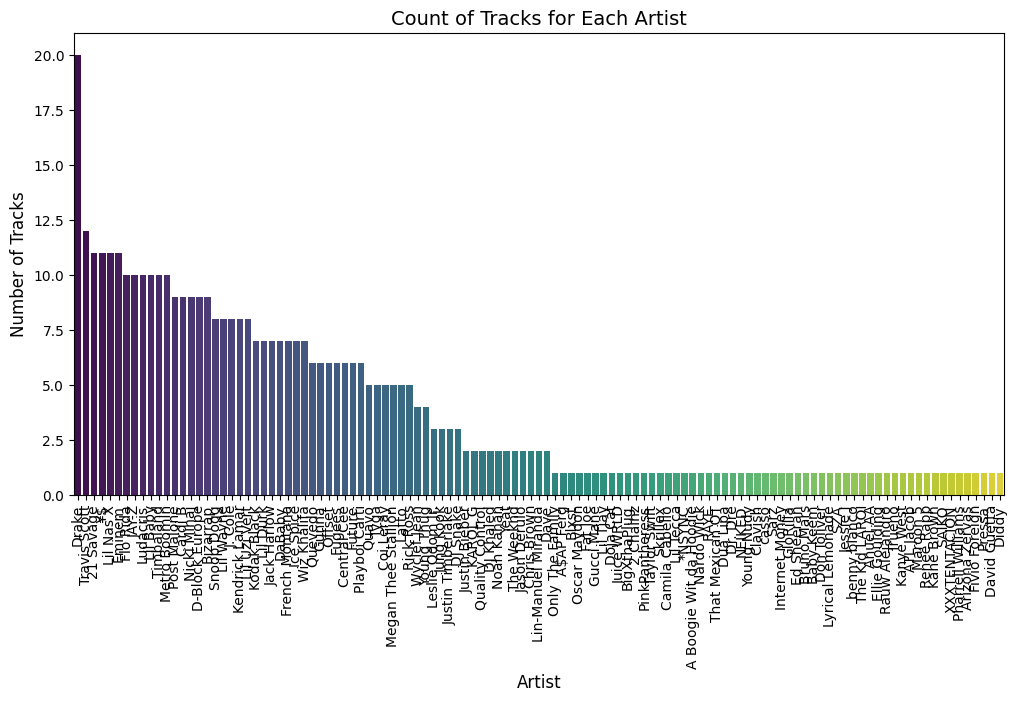

In [8]:
#Question_No.4: Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
#a countplot.

#Answer:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('spotify.csv')

# Step 2: Check for the 'artist' column (or similar)
print(df.columns)

# Step 3: Count the number of tracks for each artist
artist_track_count = df['Artist'].value_counts()

# Step 4: Display the artist with the highest number of tracks
highest_artist = artist_track_count.idxmax()
highest_count = artist_track_count.max()

print(f"The artist with the highest number of tracks is '{highest_artist}' with {highest_count} tracks.")

# Step 5: Plot the count of tracks for each artist using a countplot
plt.figure(figsize=(12,6))

# Countplot for track counts by artist
sns.countplot(data=df, x='Artist', order=artist_track_count.index, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add title and labels
plt.title('Count of Tracks for Each Artist', fontsize=14)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)

# Show the plot
plt.show()

In [9]:
#Question_No.5: What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

#Answer:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv('spotify.csv')

# Step 2: Check for the necessary columns: 'track_name', 'artist', and 'popularity'
print(df.columns)

# Step 3: Sort the dataset by 'popularity' in ascending order to get least popular tracks
# Assuming 'track_name' is the name of the track, 'artist' is the artist name, and 'popularity' is the popularity score
least_popular_tracks = df[['Track Name', 'Artist', 'Popularity']].sort_values(by='Popularity').head(5)

# Step 4: Display the top 5 least popular tracks
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks)

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')
Top 5 Least Popular Tracks:
                        Track Name          Artist  Popularity
207  Attachments (feat. Coi Leray)          Pressa          29
231                     Intentions   Justin Bieber          35
435                Splash Brothers  French Montana          44
413                Splash Brothers  French Montana          44
225                  On Me - Remix        Lil Baby          47


In [10]:
#Question_No.6:Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
#display the average popularity for each artist.

#Answer:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv('spotify.csv')

# Step 2: Check for the necessary columns: 'artist' and 'popularity'
print(df.columns)

# Step 3: Calculate the average popularity for each artist
average_popularity = df.groupby('Artist')['Popularity'].mean()

# Step 4: Get the top 5 most popular artists (based on average popularity)
top_5_artists = average_popularity.nlargest(5)

# Step 5: Display the average popularity for each of the top 5 artists
print("Average Popularity for the Top 5 Artists:")
print(top_5_artists)

# Step 6: Identify the artist with the highest average popularity
most_popular_artist = top_5_artists.idxmax()
highest_avg_popularity = top_5_artists.max()

print(f"\nThe artist with the highest average popularity is '{most_popular_artist}' with an average popularity of {highest_avg_popularity:.2f}.")

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')
Average Popularity for the Top 5 Artists:
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    87.000000
¥$              86.090909
Name: Popularity, dtype: float64

The artist with the highest average popularity is 'cassö' with an average popularity of 92.00.


In [11]:
#Question_No.7:For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

#Answer:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv('spotify.csv')

# Step 2: Check for the necessary columns: 'artist', 'track_name', and 'popularity'
print(df.columns)

# Step 3: Calculate the average popularity for each artist
average_popularity = df.groupby('Artist')['Popularity'].mean()

# Step 4: Get the top 5 most popular artists based on average popularity
top_5_artists = average_popularity.nlargest(5)

# Step 5: For each of the top 5 artists, find their most popular track
most_popular_tracks = {}

for artist in top_5_artists.index:
    # Filter the dataset for the current artist
    artist_tracks = df[df['Artist'] == artist]
    
    # Get the track with the highest popularity for the current artist
    most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]
    
    # Store the most popular track and its artist
    most_popular_tracks[artist] = most_popular_track['Track Name']

# Step 6: Display the most popular track for each top 5 artist
print("Most Popular Tracks for the Top 5 Artists:")
for artist, track in most_popular_tracks.items():
    print(f"Artist: {artist} - Most Popular Track: {track}")

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')
Most Popular Tracks for the Top 5 Artists:
Artist: cassö - Most Popular Track: Prada
Artist: Trueno - Most Popular Track: Mamichula - con Nicki Nicole
Artist: David Guetta - Most Popular Track: Baby Don't Hurt Me
Artist: Travis Scott - Most Popular Track: FE!N (feat. Playboi Carti)
Artist: ¥$ - Most Popular Track: CARNIVAL


Index(['Popularity', 'Duration (ms)'], dtype='object')


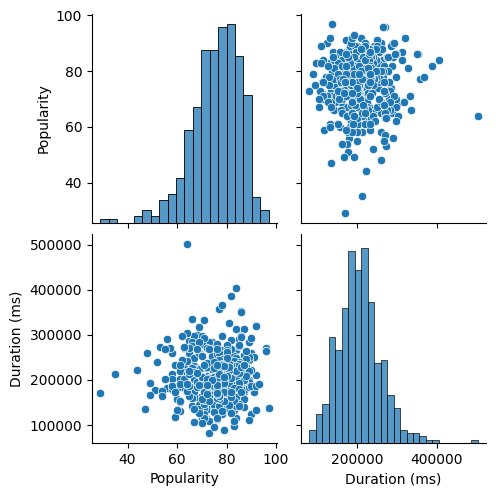

In [12]:
#Question_No.8:Visualize relationships between multiple numerical variables simultaneously using a pair plot.

#Answer:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('spotify.csv')

# Step 2: Check the numerical columns in the dataset
print(df.select_dtypes(include=['number']).columns)

# Step 3: Select numerical columns for the pair plot
# Assuming columns like 'popularity', 'duration_ms', etc. are numerical
numerical_columns = df.select_dtypes(include=['number']).columns

# Step 4: Create a pair plot to visualize relationships between numerical variables
sns.pairplot(df[numerical_columns])

# Step 5: Show the plot
plt.show()

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')


/tmp/ipykernel_16118/835066043.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Artist', y='Duration (ms)', palette='viridis')


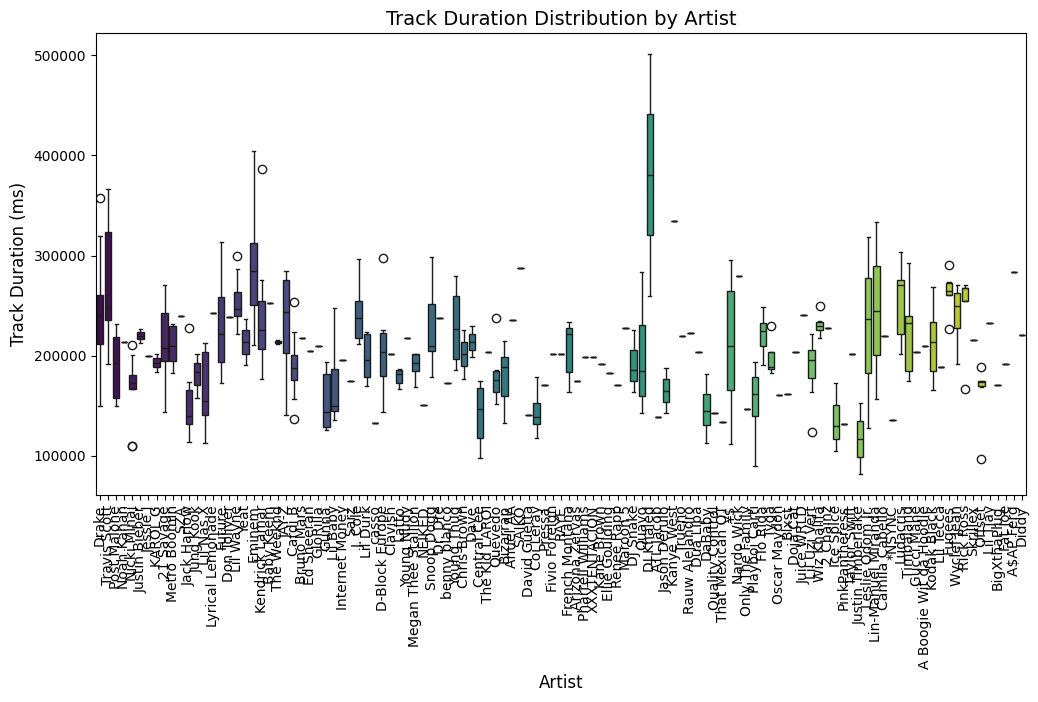

In [14]:
#Question_No.9: Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
#violin plot.

#Answer:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('spotify.csv')

# Step 2: Check for necessary columns
print(df.columns)

# Step 3: Create a box plot to show the distribution of track duration across different artists
plt.figure(figsize=(12,6))

# Create a boxplot for track duration by artist
sns.boxplot(data=df, x='Artist', y='Duration (ms)', palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add title and labels
plt.title('Track Duration Distribution by Artist', fontsize=14)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Track Duration (ms)', fontsize=12)

# Show the plot
plt.show()

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')


/tmp/ipykernel_16118/2799036169.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x='Artist', y='Popularity', palette='viridis')
/home/zaid-khan/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/zaid-khan/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/zaid-khan/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 66.7% of the points cannot be placed; you may want

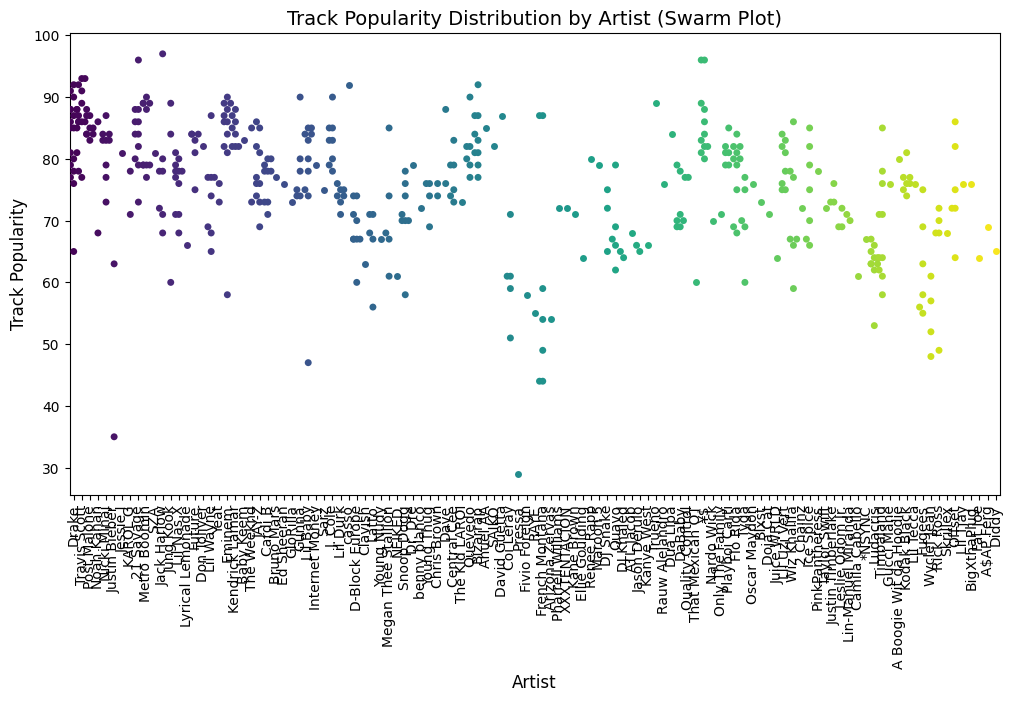

In [15]:
#Question_No.10: How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
#violin plot.

#Answer:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('spotify.csv')

# Step 2: Check for necessary columns
print(df.columns)

# Step 3: Create a swarm plot to show the distribution of track popularity across different artists
plt.figure(figsize=(12,6))

# Create a swarm plot for track popularity by artist
sns.swarmplot(data=df, x='Artist', y='Popularity', palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add title and labels
plt.title('Track Popularity Distribution by Artist (Swarm Plot)', fontsize=14)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Track Popularity', fontsize=12)

# Show the plot
plt.show()